# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
nation_df = pd.read_csv('https://itsdati.blob.core.windows.net/dati/BC_nation1.csv')

# nation_df.head(5)

In [4]:
nation_df = nation_df[(nation_df['age'] == 'All ages') & (nation_df['measure'] == 'Deaths') & (nation_df['metric'] != 'Number')]

nation_df.drop(columns=[
  'measure',
  'sex',
  'age',
  'cause',
  'upper',
  'lower'
], inplace=True)

nation_df.reset_index(drop=True, inplace=True)

In [6]:
nation_df.head(5)

,location,metric,year,val
0,Timor-Leste,Percent,1990,0.002914
1,Timor-Leste,Rate,1990,2.908307
2,Haiti,Percent,1990,0.005943
3,Haiti,Rate,1990,7.858706
4,Lebanon,Percent,1990,0.014231


In [7]:
region_sdi_df = pd.read_csv('https://itsdati.blob.core.windows.net/dati/BC_region_SDI1.csv')

# region_sdi_df.head(5)

In [8]:
region_sdi_df = region_sdi_df[(region_sdi_df['age'] == 'All ages') & (region_sdi_df['location'] != 'Global') & (region_sdi_df['measure'] == 'Deaths') & (region_sdi_df['metric'] != 'Number')]

region_sdi_df.drop(columns=[
  'measure',
  'sex',
  'age',
  'cause',
  'upper',
  'lower'
], inplace=True)

region_sdi_df.reset_index(drop=True, inplace=True)

In [9]:
region_sdi_df.head(5)

,location,metric,year,val
0,High SDI,Rate,1990,16.720494
1,High-middle SDI,Rate,1991,9.229364
2,Low-middle SDI,Rate,1990,4.118096
3,Low SDI,Rate,1990,3.694908
4,Low-middle SDI,Rate,1991,4.144819


In [10]:
percent_df = pd.read_csv('https://itsdati.blob.core.windows.net/dati/BC_Percent1.csv')

# percent_df.head(5)

In [11]:
percent_df = percent_df[(percent_df['age'] == 'All ages') & (percent_df['location'] != 'Global') & (percent_df['measure'] == 'Deaths') & (percent_df['metric'] != 'Number')]

percent_df.drop(columns=[
  'measure',
  'sex',
  'age',
  'upper',
  'lower'
], inplace=True)

percent_df['location'], percent_df['year'] = percent_df['year'], percent_df['location']

percent_df['location'].replace({k:v for (k,v) in zip(percent_df['location'].unique(), region_sdi_df['location'].unique())}, inplace=True)

percent_df.reset_index(drop=True, inplace=True)

In [12]:
percent_df.head(5)

,location,cause,metric,year,val
0,High SDI,Tobacco,Percent,1991,0.067526
1,High SDI,Tobacco,Rate,1991,0.483323
2,High SDI,Alcohol use,Percent,1991,0.072007
3,High SDI,Alcohol use,Rate,1991,0.515337
4,High SDI,Metabolic risks,Percent,1991,0.088553


In [13]:
region_df = pd.read_csv('https://itsdati.blob.core.windows.net/dati/BC_region1.csv')

# region_df.head(5)

In [14]:
region_df = region_df[(region_df['age'] == 'All ages') & (region_df['location'] != 'Global') & (region_df['measure'] == 'Deaths') & (region_df['metric'] != 'Number')]

region_df.drop(columns=[
  'measure',
  'sex',
  'age',
  'cause',
  'upper',
  'lower'
], inplace=True)

region_df.reset_index(drop=True, inplace=True)

In [15]:
region_df.head(5)

,location,metric,year,val
0,Southeast Asia,Rate,1990,6.265323
1,Australasia,Rate,1990,16.086871
2,North Africa and Middle East,Rate,1990,3.455839
3,Central Sub-Saharan Africa,Rate,1990,4.203818
4,High-income North America,Rate,1990,18.825668


# Descriptive Statistical Analysis

In [16]:
stats_df = pd.DataFrame({df_name: df['val'].describe() for df_name, df in zip(['nation', 'region', 'region_sdi', 'percent'], [nation_df, region_df, region_sdi_df, percent_df])})

stats_df

,nation,region,region_sdi,percent
count,11424.000000,588.000000,140.000000,1680.000000
mean,5.034730,9.588936,8.313292,0.257345
std,7.144169,5.596122,4.630837,0.422765
min,0.000575,3.455839,3.694908,0.007054
25%,0.011501,4.714234,4.478581,0.037005
50%,0.685484,7.879093,6.071141,0.082127
75%,7.251616,15.039983,10.816767,0.257757
max,44.792527,23.588512,16.859194,2.350804


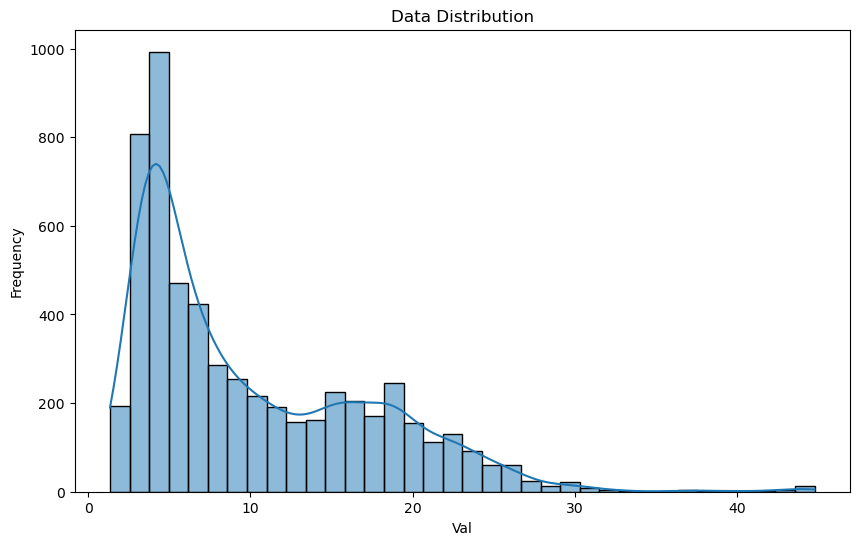

In [17]:
# Distribution of 'val' data in the 'nation' table
plt.figure(figsize = (10, 6))

sns.histplot(nation_df[nation_df['metric'] == 'Rate']['val'], kde = True)

plt.title('Data Distribution')
plt.xlabel('Val')
plt.ylabel('Frequency')

plt.show()

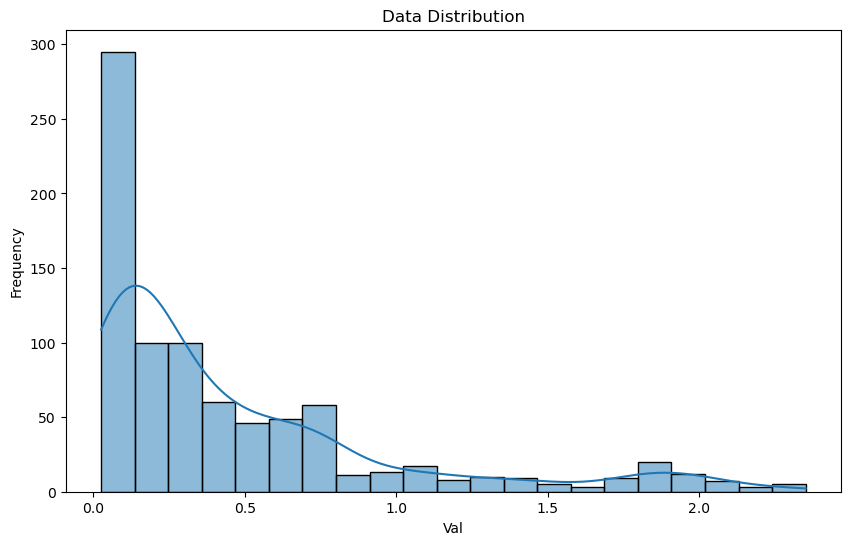

In [18]:
# Distribution of 'val' data in the 'percent' table
plt.figure(figsize = (10, 6))

sns.histplot(percent_df[percent_df['metric'] == 'Rate']['val'], kde = True)

plt.title('Data Distribution')
plt.xlabel('Val')
plt.ylabel('Frequency')

plt.show()

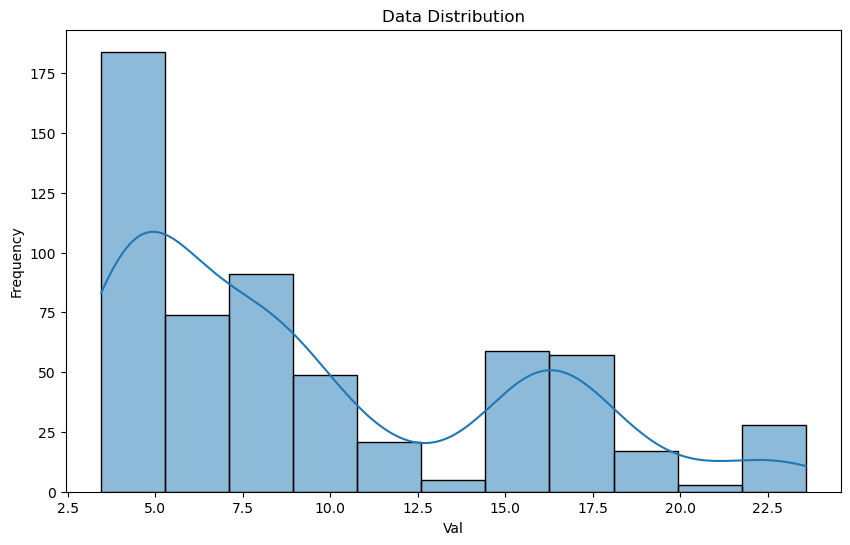

In [19]:
# Distribution of 'val' data in the 'region' table
plt.figure(figsize = (10, 6))

sns.histplot(region_df[region_df['metric'] == 'Rate']['val'], kde = True)

plt.title('Data Distribution')
plt.xlabel('Val')
plt.ylabel('Frequency')

plt.show()

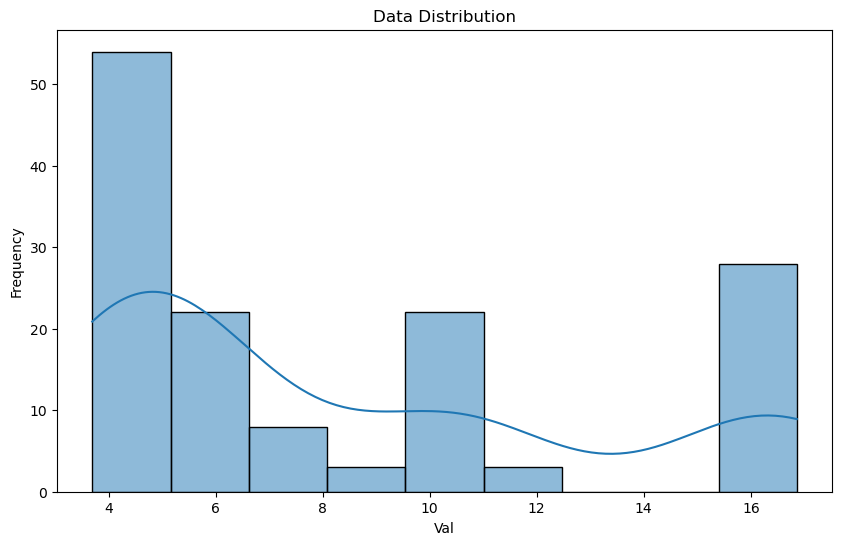

In [20]:
# Distribution of 'val' data in the 'sdi' table
plt.figure(figsize = (10, 6))

sns.histplot(region_sdi_df[region_sdi_df['metric'] == 'Rate']['val'], kde = True)

plt.title('Data Distribution')
plt.xlabel('Val')
plt.ylabel('Frequency')

plt.show()

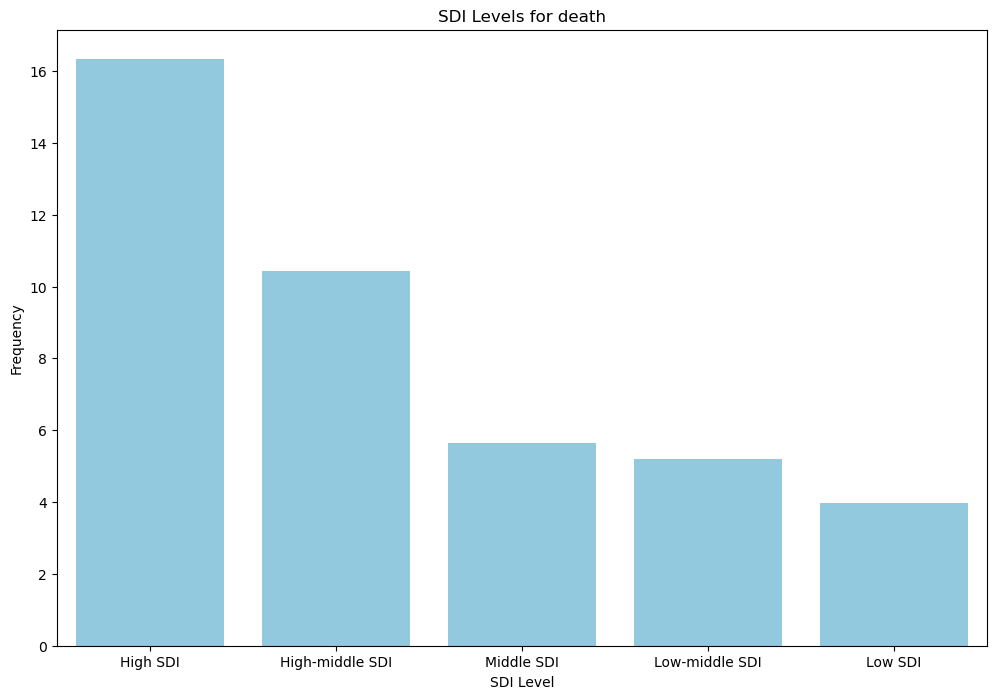

In [21]:
plt.figure(figsize = (12, 8))

sns.barplot(x='location', y='val', data=region_sdi_df[region_sdi_df['metric'] == 'Rate'], errorbar=None, color = 'skyblue', order=['High SDI', 'High-middle SDI', 'Middle SDI', 'Low-middle SDI', 'Low SDI'])

plt.title('SDI Levels for death')
plt.xlabel('SDI Level')
plt.ylabel('Frequency')

plt.show()

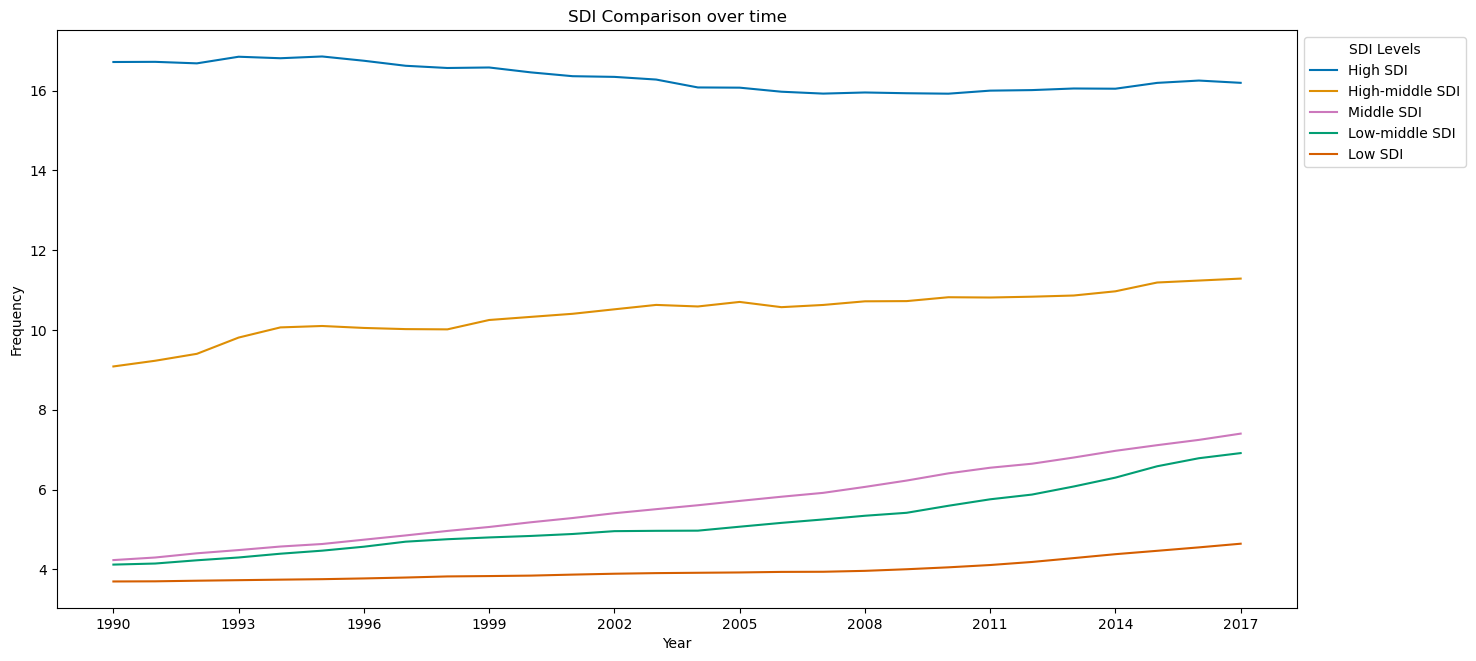

In [22]:
plt.figure(figsize = (16, 7.5))

sns.lineplot(x = 'year', y = 'val', hue = 'location', data = region_sdi_df[region_sdi_df['metric'] == 'Rate'], errorbar=None, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('SDI Comparison over time')
plt.xlabel('Year')
plt.ylabel('Frequency')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 4, 2, 3]
plt.legend(title = 'SDI Levels', handles=[handles[idx] for idx in order], labels=[labels[idx] for idx in order], bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

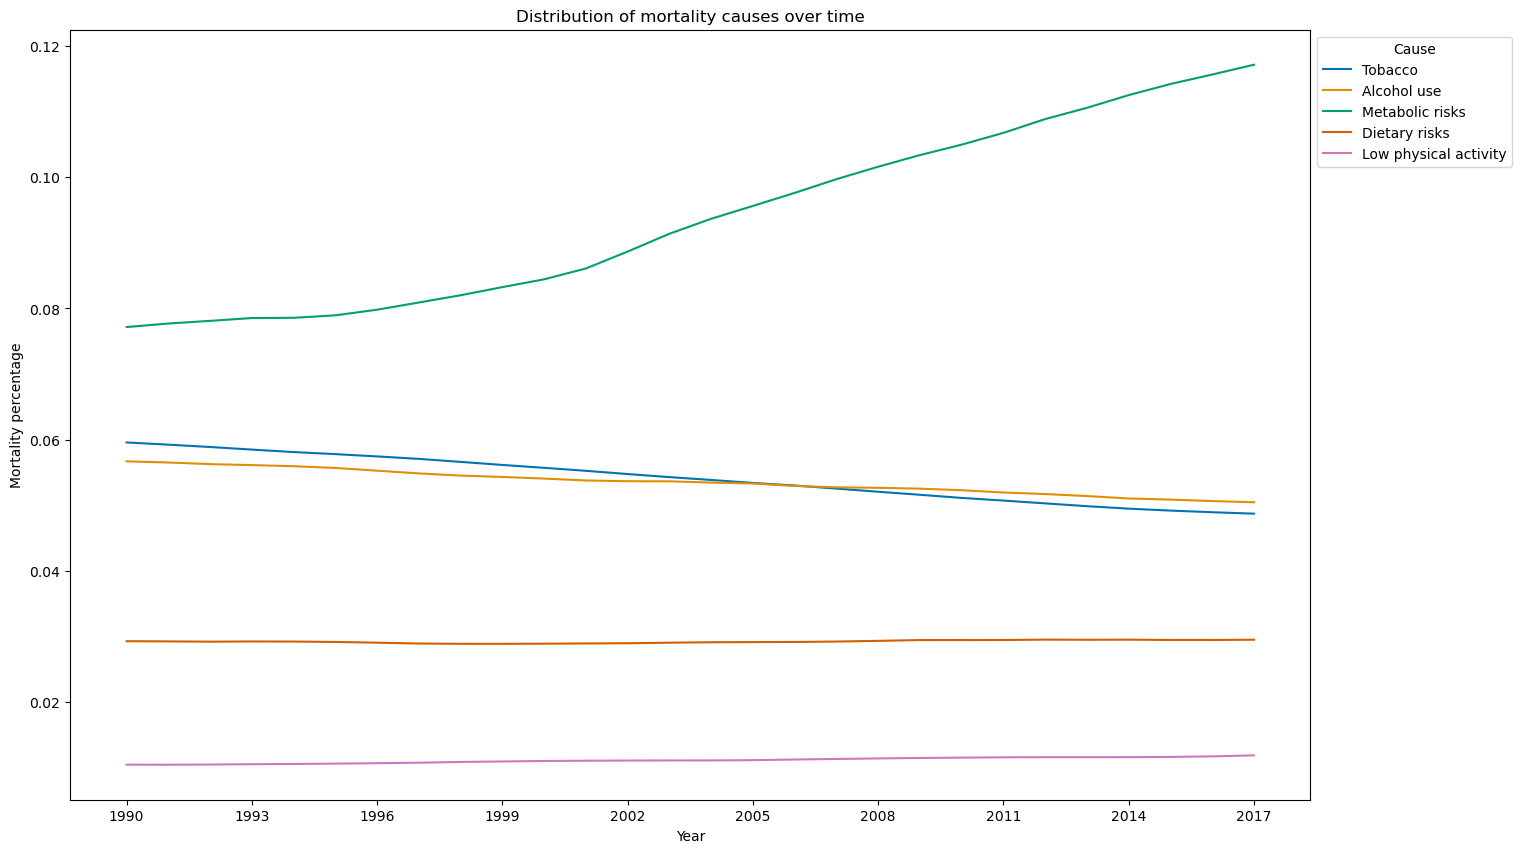

In [23]:
plt.figure(figsize = (16, 10))

sns.lineplot(x = 'year', y = 'val', hue = 'cause', data = percent_df[percent_df['metric'] == 'Percent'], errorbar=None, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Distribution of mortality causes over time')
plt.xlabel('Year')
plt.ylabel('Mortality percentage')

plt.legend(title = 'Cause', bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

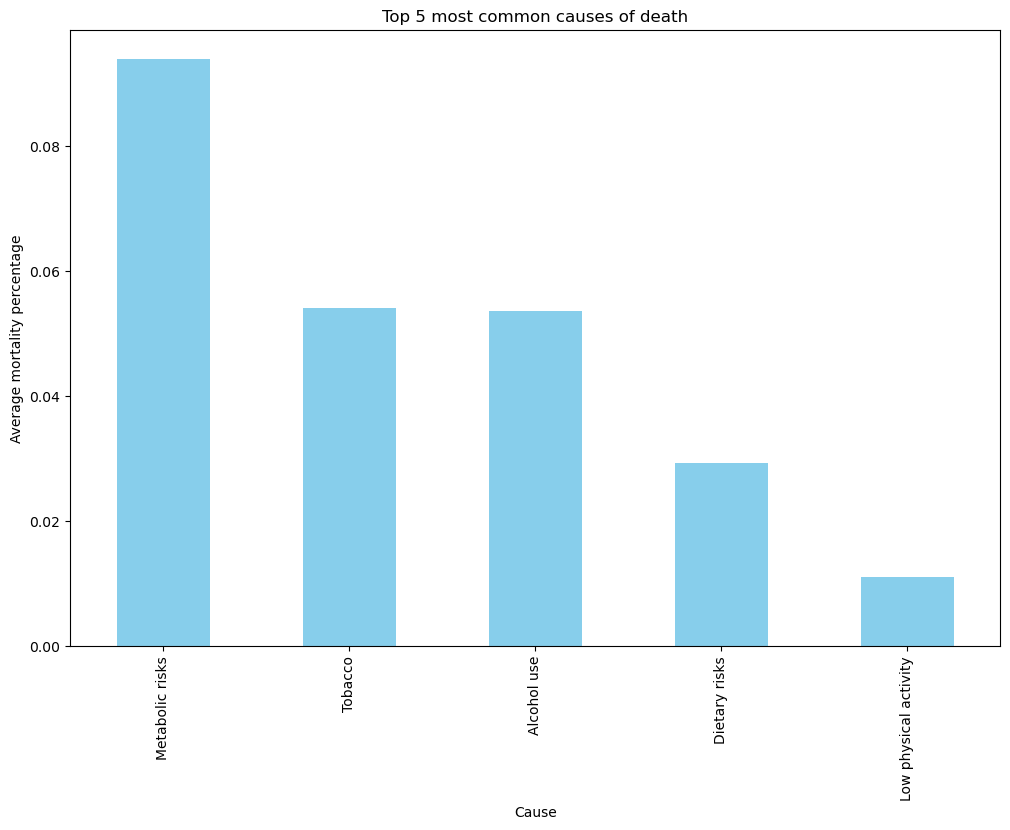

In [24]:
plt.figure(figsize = (12, 8))

top_causes = percent_df[percent_df['metric'] == 'Percent'].groupby('cause')['val'].mean().sort_values(ascending = False).head(5)
top_causes.plot(kind = 'bar', color = 'skyblue')

plt.title('Top 5 most common causes of death')
plt.xlabel('Cause')
plt.ylabel('Average mortality percentage')

plt.show()

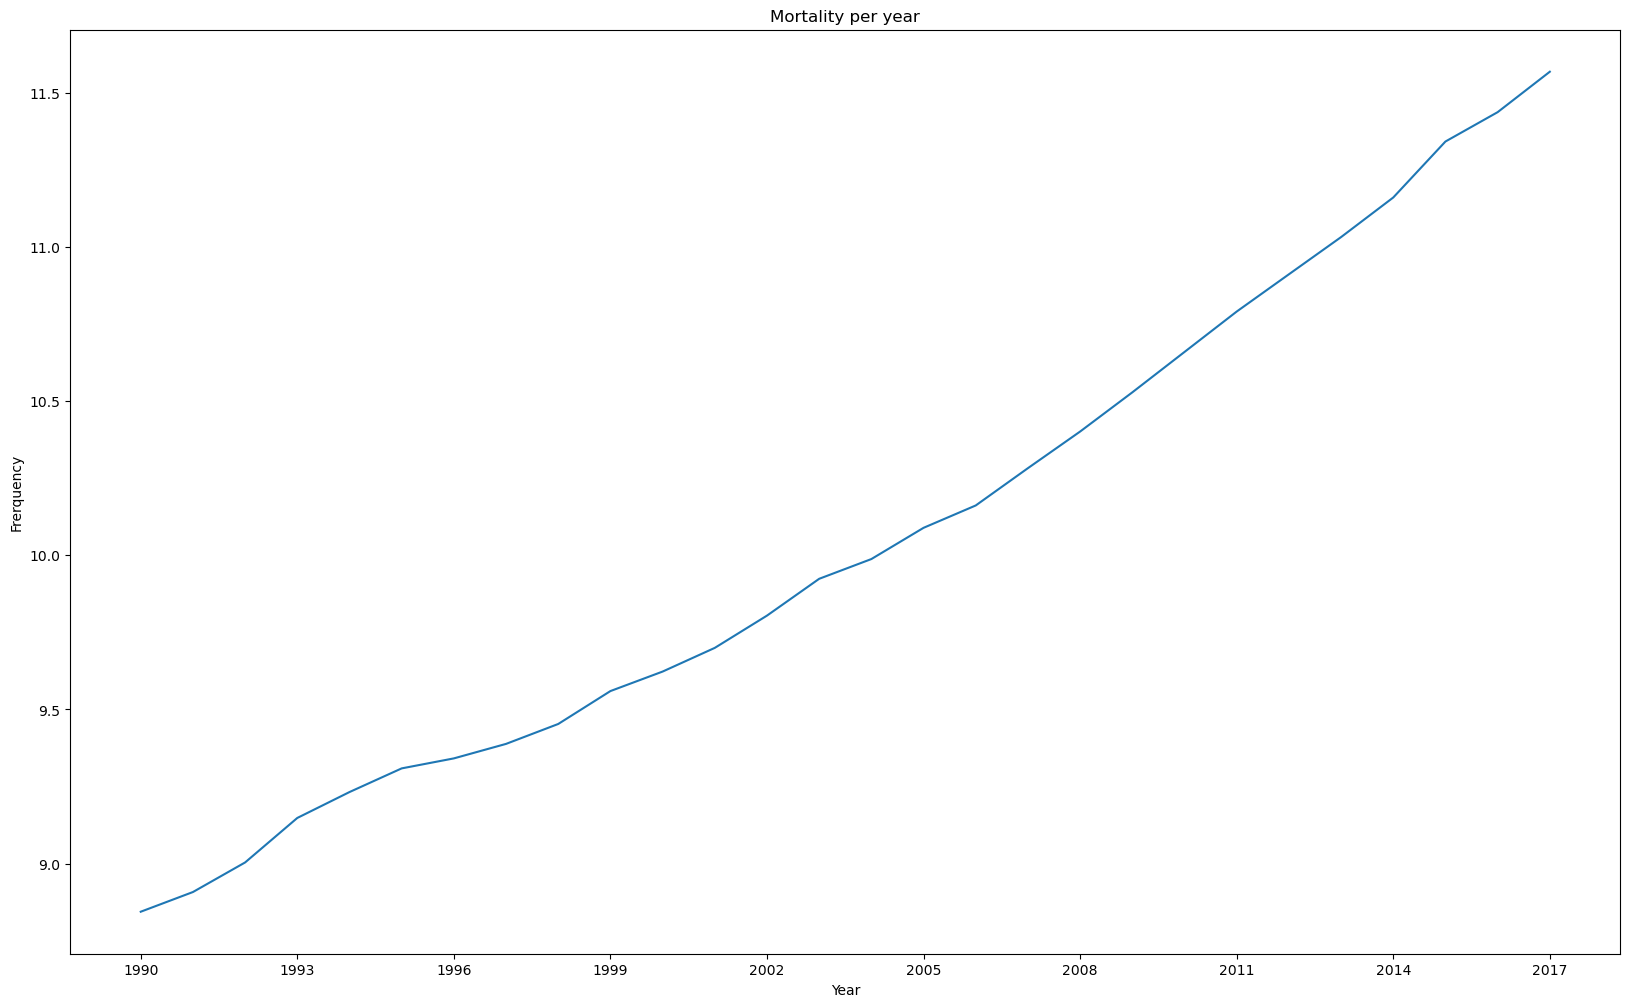

In [25]:
plt.figure(figsize = (20, 12))

sns.lineplot(x = 'year', y = 'val', data = nation_df[nation_df['metric'] == 'Rate'], errorbar=None)
plt.xticks(range(1990, 2018, 3))

plt.title('Mortality per year')
plt.xlabel('Year')
plt.ylabel('Frerquency')

plt.show()

In [323]:
from scipy.stats import linregress

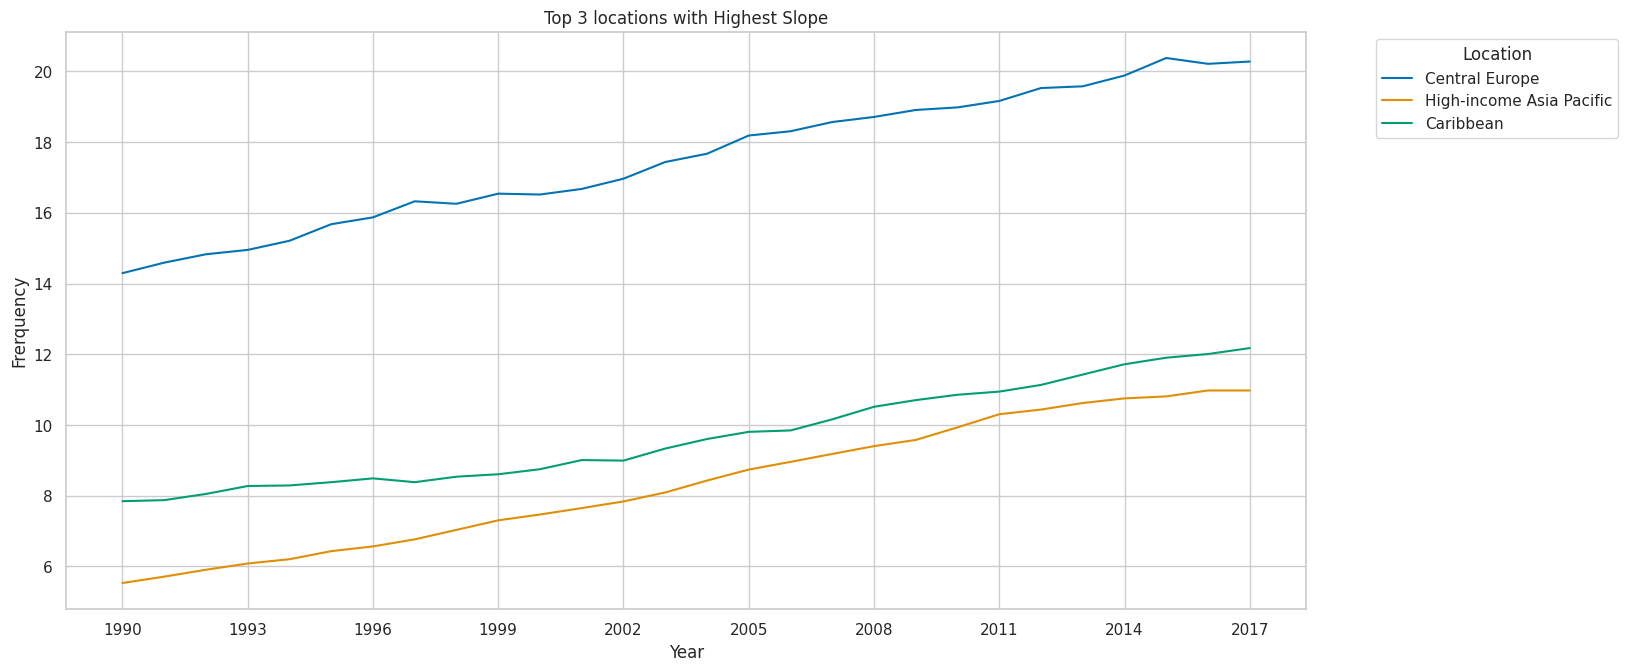

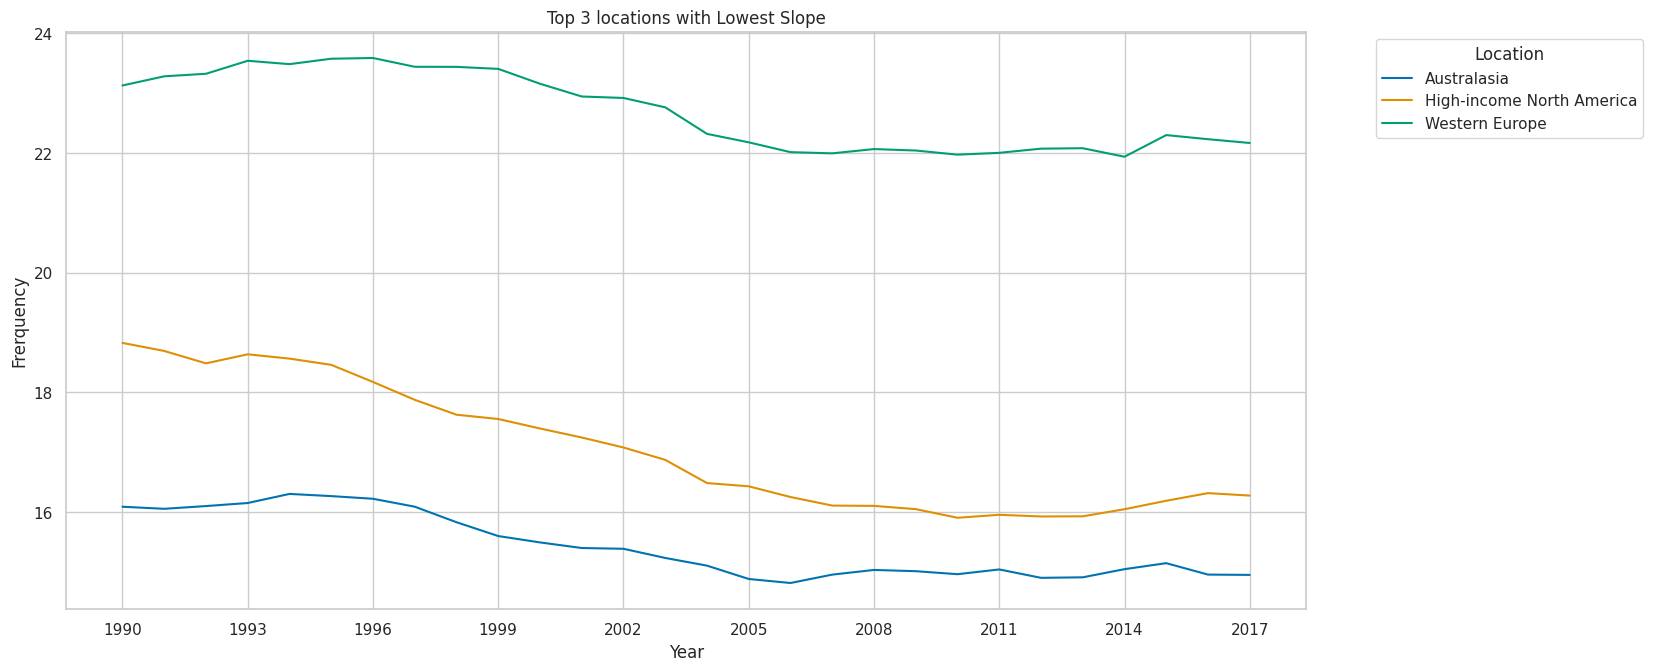

In [324]:
# Calcola la pendenza per ciascuna località
slope_data = []

region_df_rate = region_df[region_df['metric'] == 'Rate']

for location, data in region_df_rate.groupby('location'):
    result = linregress(data['year'], data['val'])
    slope_data.append({'location': location, 'slope': result.slope})

# Crea un DataFrame con le pendenze
slope_df = pd.DataFrame(slope_data)

# Seleziona le top 3 località con la pendenza più alta
top_locations_high_slope = slope_df.nlargest(3, 'slope')['location']

# Seleziona le top 3 località con la pendenza più bassa
top_locations_low_slope = slope_df.nsmallest(3, 'slope')['location']

# Filtra il DataFrame originale per includere solo le top locations con la pendenza più alta
df_filtered_high_slope = region_df_rate[region_df_rate['location'].isin(top_locations_high_slope)]


# Crea il primo grafico con le top 3 località con la pendenza più alta
plt.figure(figsize=(16, 7.5))

sns.lineplot(x='year', y='val', hue='location', data=df_filtered_high_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Top 3 locations with Highest Slope')
plt.xlabel('Year')
plt.ylabel('Frerquency')

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Filtra il DataFrame originale per includere solo le top locations con la pendenza più bassa
df_filtered_low_slope = region_df_rate[region_df_rate['location'].isin(top_locations_low_slope)]


# Crea il secondo grafico con le top 3 località con la pendenza più bassa
plt.figure(figsize=(16, 7.5))

sns.lineplot(x='year', y='val', hue='location', data=df_filtered_low_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Top 3 locations with Lowest Slope')
plt.xlabel('Year')
plt.ylabel('Frerquency')

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

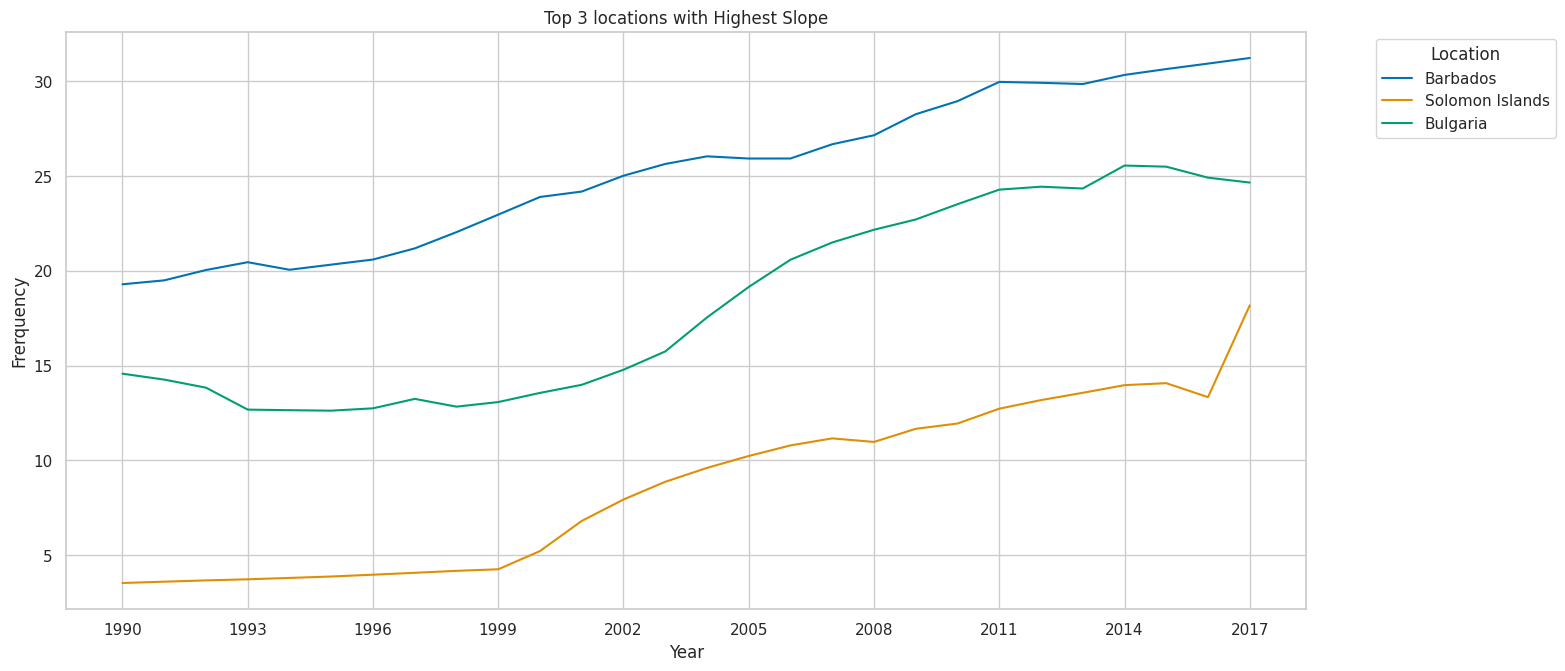

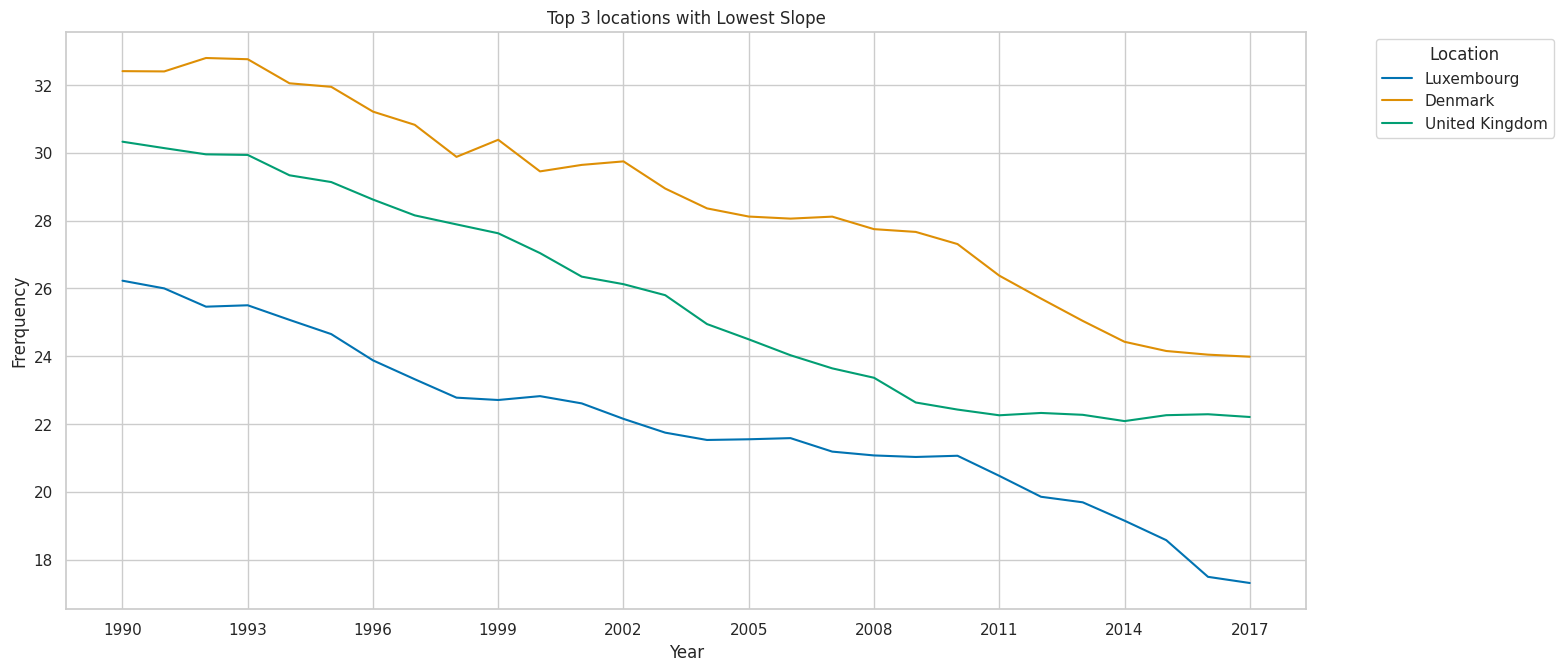

In [325]:
# Calcola la pendenza per ciascuna località
slope_data = []

nation_df_rate = nation_df[nation_df['metric'] == 'Rate']

for location, data in nation_df_rate.groupby('location'):
    result = linregress(data['year'], data['val'])
    slope_data.append({'location': location, 'slope': result.slope})

# Crea un DataFrame con le pendenze
slope_df = pd.DataFrame(slope_data)

# Seleziona le top 3 località con la pendenza più alta
top_locations_high_slope = slope_df.nlargest(3, 'slope')['location']

# Seleziona le top 3 località con la pendenza più bassa
top_locations_low_slope = slope_df.nsmallest(3, 'slope')['location']

# Filtra il DataFrame originale per includere solo le top locations con la pendenza più alta
df_filtered_high_slope = nation_df_rate[nation_df_rate['location'].isin(top_locations_high_slope)]


# Crea il primo grafico con le top 3 località con la pendenza più alta
plt.figure(figsize=(16, 7.5))

sns.lineplot(x='year', y='val', hue='location', data=df_filtered_high_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Top 3 locations with Highest Slope')
plt.xlabel('Year')
plt.ylabel('Frerquency')

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Filtra il DataFrame originale per includere solo le top locations con la pendenza più bassa
df_filtered_low_slope = nation_df_rate[nation_df_rate['location'].isin(top_locations_low_slope)]


# Crea il secondo grafico con le top 3 località con la pendenza più bassa
plt.figure(figsize=(16, 7.5))

sns.lineplot(x='year', y='val', hue='location', data=df_filtered_low_slope, palette='colorblind')
plt.xticks(range(1990, 2018, 3))

plt.title('Top 3 locations with Lowest Slope')
plt.xlabel('Year')
plt.ylabel('Frerquency')

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()